## IMPACT OF CARBON-DIOXIDE EMISSION ON THE ENVIRONMENT

### 1. Defining the Question

To identify major sources of carbon dioxide emissions to the environment and plan how to control them.

#### a) Specifying the Data Analytic Question

To assess how much Carbon Dioxide is emitted as a result of using Coal, Cement, Gas, Flaring and other general causes.

#### What is our research question/hypothesis?

**Null Hypothesis (μ1=μ2):** 

Areas with the highest measurements per capita are responsible for the highest rates of carbon dioxide emissions.


**Alternative Hypothesis (μ1≠μ2):**

Areas with the highest measurements per capita are  not responsible for the highest rates of carbon dioxide emissions.

Statistical test: sample z-test

Signifance level, alpha = 0.05

### b) Defining the Metric for Success


The major sources of carbon dioxide emissions will be determined

### c) Understanding the context


Human activities have increased CO2 concentrations in the atmosphere by around 50% since the beginning of the industrial period (1750). This is significantly greater than what would have occurred organically during a 20,000-year span (from the Last Glacial Maximum to 1750, from 185 ppm to 278 ppm). The severity of harmful human-induced climate change is determined not only by the extent of the change, but also by its irreversibility potential. The removal of atmospheric carbon dioxide reduces radiative forcing once emissions stop, but this is more than offset by slower heat loss to the ocean, thus atmospheric temperatures do not drop considerably until at least 1,000 years.

### d) Recording the Experimental Design

- Loading the data
- Cleaning the data
- Performing univariate, Bivariate and multivariate analysis
- Sampling
- Hypothesis testing
- Checking for normality
- Time Series Analysis
- Conclusion
- Recommendation





### e) Data Relevance

The dataset was sourced from https://github.com/owid/co2-data

It contains various sources of carbon dioxide, countries and years up to 2020 making it suitable for our study.

## 2. Reading the Data

### Importing Libraries and the dataset

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.cluster import KMeans
from statsmodels.stats import weightstats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#import the dataset
carborn = pd.read_csv("/content/owid-co2-data.csv")


####Previewing The dataset

In [ ]:
#previewing the first five rows
carborn.head(5)

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [ ]:
#previewing the last five rows
carborn.tail(5)

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
25186,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,47.5,3385.574,1.889
25187,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,NaN,NaN,NaN
25188,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,NaN,NaN,NaN
25189,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN
25190,ZWE,Zimbabwe,2020,10.531,0.709,NaN,0.697,0.047,6.257,0.421,...,NaN,NaN,NaN,NaN,NaN,14862927.0,NaN,NaN,NaN,NaN


In [ ]:
#The shape of the dataset
carborn.shape

(25191, 60)

In [ ]:
#The columns of the dataset
carborn.columns

Index(['iso_code', 'country', 'year', 'co2', 'co2_per_capita', 'trade_co2',
       'cement_co2', 'cement_co2_per_capita', 'coal_co2',
       'coal_co2_per_capita', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_industry_co2', 'other_co2_per_capita', 'co2_growth_prct',
       'co2_growth_abs', 'co2_per_gdp', 'co2_per_unit_energy',
       'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_co2', 'cumulative_cement_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'trade_co2_share',
       'share_global_co2', 'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'share_global_cumulative_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [ ]:
#dropping the columns
carborn = carborn.drop(columns=['iso_code','co2','trade_co2','cement_co2','coal_co2','flaring_co2',
                                'gas_co2','oil_co2','other_industry_co2','co2_per_gdp','co2_per_unit_energy',
                                'consumption_co2','consumption_co2_per_gdp','cumulative_co2','cumulative_cement_co2',
                                'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
                               'cumulative_oil_co2', 'cumulative_other_co2','trade_co2_share','share_global_co2',
                                'share_global_cement_co2', 'share_global_coal_co2',
                                'share_global_flaring_co2', 'share_global_gas_co2',
                                'share_global_oil_co2', 'share_global_other_co2',
                                'share_global_cumulative_co2', 'share_global_cumulative_cement_co2',
                                'share_global_cumulative_coal_co2',
                                'share_global_cumulative_flaring_co2',
                                'share_global_cumulative_gas_co2', 'share_global_cumulative_oil_co2',
                                'share_global_cumulative_other_co2', 'total_ghg','total_ghg_excluding_lucf', 
                                'ghg_excluding_lucf_per_capita', 'methane','nitrous_oxide','gdp',
                                'primary_energy_consumption','energy_per_gdp'])

In [ ]:
carborn.head(5)

,country,year,co2_per_capita,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,co2_growth_prct,co2_growth_abs,consumption_co2_per_capita,ghg_per_capita,methane_per_capita,nitrous_oxide_per_capita,population,energy_per_capita
0,Afghanistan,1949,0.002,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN
1,Afghanistan,1950,0.011,NaN,0.003,NaN,NaN,0.008,NaN,475.0,0.070,NaN,NaN,NaN,NaN,7752117.0,NaN
2,Afghanistan,1951,0.012,NaN,0.003,NaN,NaN,0.008,NaN,8.7,0.007,NaN,NaN,NaN,NaN,7840151.0,NaN
3,Afghanistan,1952,0.012,NaN,0.004,NaN,NaN,0.008,NaN,0.0,0.000,NaN,NaN,NaN,NaN,7935996.0,NaN
4,Afghanistan,1953,0.013,NaN,0.005,NaN,NaN,0.008,NaN,16.0,0.015,NaN,NaN,NaN,NaN,8039684.0,NaN


In [ ]:
#Description of the dataset
carborn.describe()

,year,co2_per_capita,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,co2_growth_prct,co2_growth_abs,consumption_co2_per_capita,ghg_per_capita,methane_per_capita,nitrous_oxide_per_capita,population,energy_per_capita
count,25191.000000,23307.000000,12218.000000,16860.000000,4381.000000,8835.000000,20181.000000,1999.000000,24931.000000,23585.000000,3976.000000,5651.000000,5655.000000,5655.000000,2.289200e+04,8681.000000
mean,1953.195546,4.170811,0.113037,1.551520,0.875319,1.413336,2.635498,0.080168,21.098600,5.146889,6.567721,7.607915,1.902152,0.601973,7.068041e+07,25568.487454
std,53.788944,14.912201,0.148907,2.552112,5.477923,3.654290,15.129275,0.055779,702.565991,55.259760,6.927957,8.267647,3.318293,0.890161,3.794737e+08,33319.956208
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.640000,-1895.244000,0.055000,-31.485000,0.000000,0.000000,1.490000e+03,0.000000
25%,1924.000000,0.253000,0.020000,0.054000,0.021000,0.031000,0.121000,0.036000,-0.450000,-0.011000,1.240250,2.655500,0.691000,0.221000,1.287425e+06,3270.369000
50%,1967.000000,1.250000,0.070000,0.441500,0.068000,0.282000,0.630000,0.071000,3.350000,0.059000,4.359500,5.386000,1.077000,0.377000,4.869928e+06,13701.318000
75%,1995.000000,4.657500,0.156000,2.149000,0.203000,1.435500,2.474000,0.107500,10.460000,1.103000,9.848500,9.604500,1.619000,0.589000,1.757624e+07,35493.775000
max,2020.000000,748.639000,2.738000,34.184000,94.711000,52.484000,748.639000,0.357000,102318.510000,1736.258000,57.792000,74.729000,39.795000,10.056000,7.794799e+09,317582.498000


In [ ]:
#Getting the datatypes in the dataset 
carborn.dtypes

country                        object
year                            int64
co2_per_capita                float64
cement_co2_per_capita         float64
coal_co2_per_capita           float64
flaring_co2_per_capita        float64
gas_co2_per_capita            float64
oil_co2_per_capita            float64
other_co2_per_capita          float64
co2_growth_prct               float64
co2_growth_abs                float64
consumption_co2_per_capita    float64
ghg_per_capita                float64
methane_per_capita            float64
nitrous_oxide_per_capita      float64
population                    float64
energy_per_capita             float64
dtype: object

In [ ]:
# Finding the unique values in the year column
carborn['year'].unique

<bound method Series.unique of 0        1949
1        1950
2        1951
3        1952
4        1953
         ... 
25186    2016
25187    2017
25188    2018
25189    2019
25190    2020
Name: year, Length: 25191, dtype: int64>

**Filtering the years**

In [ ]:
#Filtering the years greater than 2010
carborn= carborn[carborn['year'] >= 2010]

In [ ]:
# Previewing the filtered years
carborn['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
carborn.shape

(2673, 17)

#### Checking for the null values

In [ ]:
total = carborn.isnull().sum().sort_values(ascending=False)
percentage = (carborn.isnull().sum()/carborn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
other_co2_per_capita,2046,0.765432
flaring_co2_per_capita,1754,0.656192
consumption_co2_per_capita,1352,0.505799
gas_co2_per_capita,1186,0.443696
coal_co2_per_capita,1158,0.433221
energy_per_capita,970,0.362888
ghg_per_capita,918,0.343434
methane_per_capita,918,0.343434
nitrous_oxide_per_capita,918,0.343434
cement_co2_per_capita,897,0.335578


**Filling the null values**

In [ ]:
#filling the missing values using backward method
carborn_null= carborn.bfill(axis ='rows')

In [ ]:
# Checking for null values
carborn_null.isnull().sum()

# Dropping the null values
carborn = carborn_null.dropna()
carborn.isnull().sum()

country                       0
year                          0
co2_per_capita                0
cement_co2_per_capita         0
coal_co2_per_capita           0
flaring_co2_per_capita        0
gas_co2_per_capita            0
oil_co2_per_capita            0
other_co2_per_capita          0
co2_growth_prct               0
co2_growth_abs                0
consumption_co2_per_capita    0
ghg_per_capita                0
methane_per_capita            0
nitrous_oxide_per_capita      0
population                    0
energy_per_capita             0
dtype: int64

##Checking for outliers

In [ ]:
carborn.shape

(2640, 17)

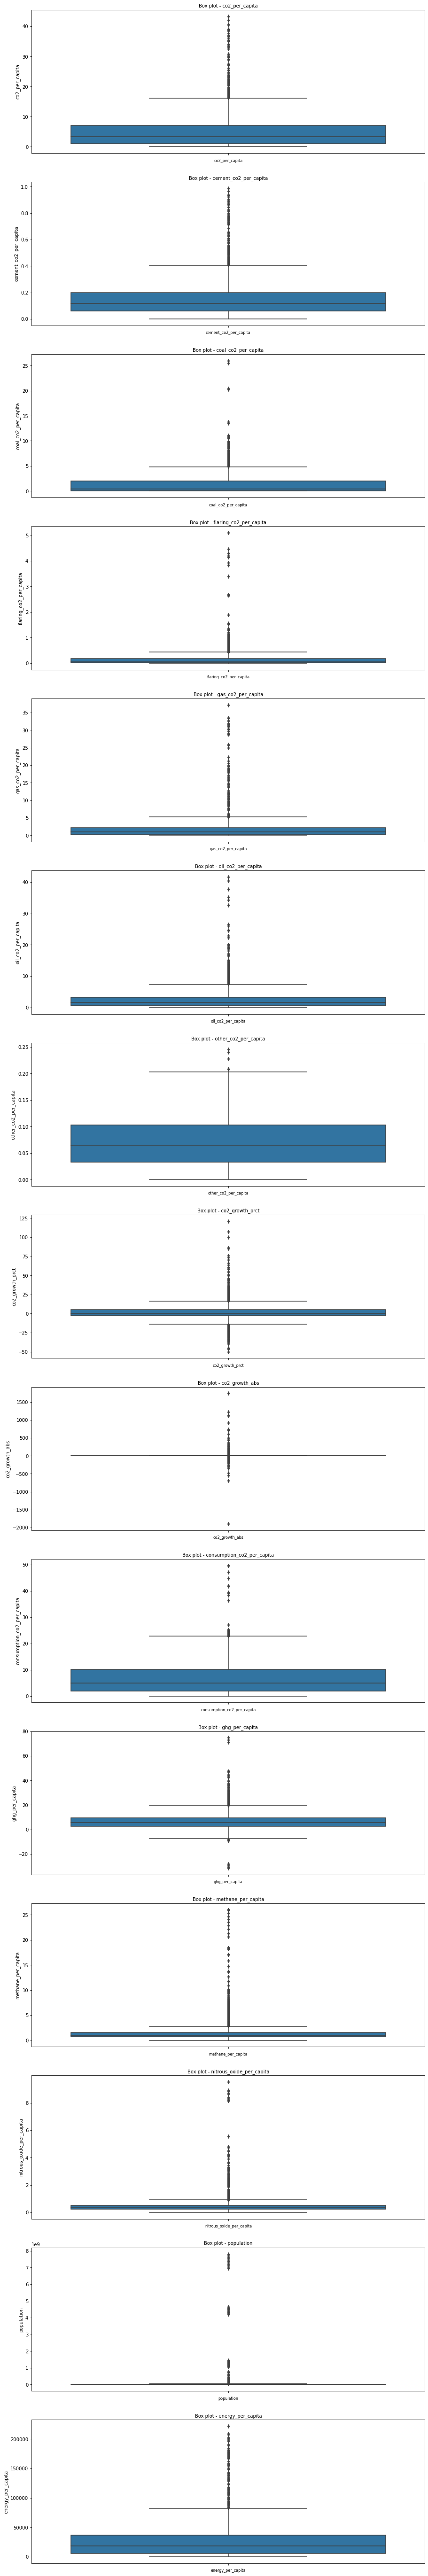

In [ ]:
col_names = ['co2_per_capita', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'co2_growth_prct',
       'co2_growth_abs', 'consumption_co2_per_capita', 'ghg_per_capita',
       'methane_per_capita', 'nitrous_oxide_per_capita', 'population',
       'energy_per_capita']

fig, ax = plt.subplots(len(col_names), figsize=(15,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=carborn[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

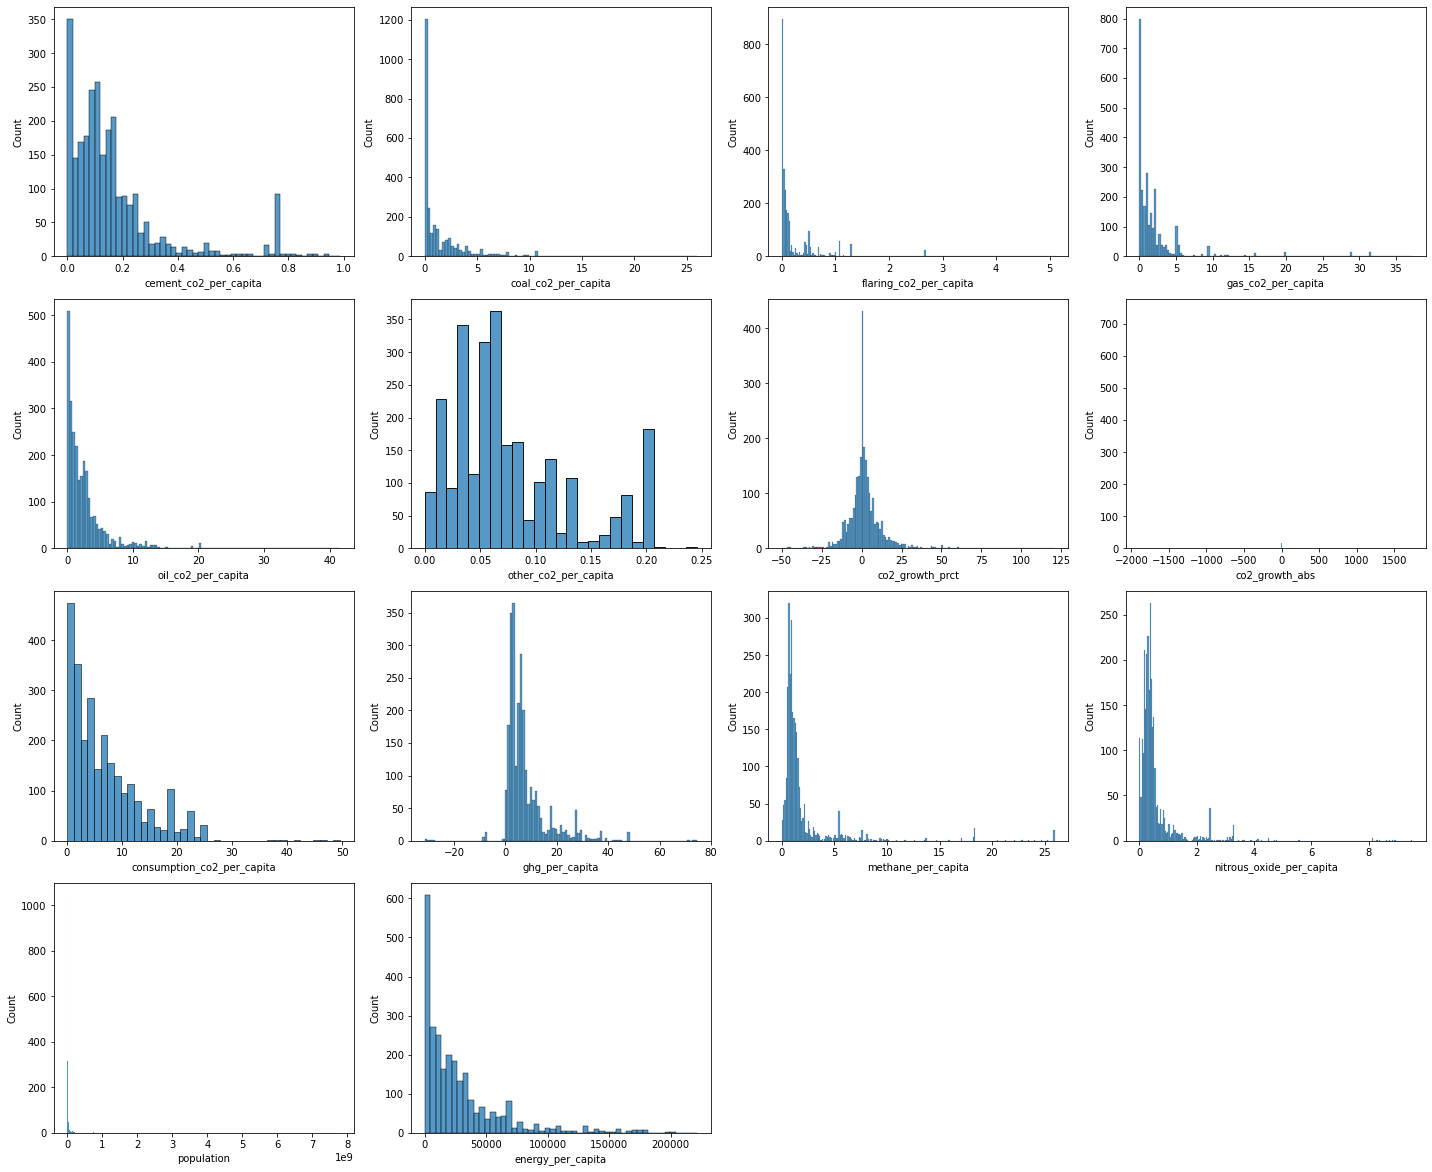

In [ ]:
#visualizing the outliers
plt.figure(figsize=(20,20))
column_list=list(carborn.columns)[3:]
plt_num=1

for i in column_list:
  if plt_num<=18:
    plt.subplot(5,4,plt_num)
    sns.histplot(carborn[i])
    plt_num=plt_num+1

  else:
    plt.subplot(5,4,plt_num)
    sns.histplot(carborn[i])
    plt_num=plt_num+1

plt.tight_layout()

In [ ]:
# Removing outliers using Quantile method

for i in column_list:
  iqr=carborn[i].quantile(0.75)-carborn[i].quantile(0.25)
  lower_boundary=carborn[i].quantile(0.25)-1.5*iqr
  upper_boundary=carborn[i].quantile(0.75)+1.5*iqr
  print("The column {} has {} outliers percentage {} %".format(i,carborn[carborn[i]>upper_boundary].shape[0]+carborn[carborn[i]<lower_boundary].shape[0],
                                                                      (carborn[carborn[i]>upper_boundary].shape[0]+carborn[carborn[i]<lower_boundary].shape[0])*100/2640))


The column cement_co2_per_capita has 225 outliers percentage 8.522727272727273 %
The column coal_co2_per_capita has 191 outliers percentage 7.234848484848484 %
The column flaring_co2_per_capita has 476 outliers percentage 18.03030303030303 %
The column gas_co2_per_capita has 227 outliers percentage 8.598484848484848 %
The column oil_co2_per_capita has 195 outliers percentage 7.386363636363637 %
The column other_co2_per_capita has 5 outliers percentage 0.1893939393939394 %
The column co2_growth_prct has 281 outliers percentage 10.643939393939394 %
The column co2_growth_abs has 823 outliers percentage 31.174242424242426 %
The column consumption_co2_per_capita has 64 outliers percentage 2.4242424242424243 %
The column ghg_per_capita has 240 outliers percentage 9.090909090909092 %
The column methane_per_capita has 330 outliers percentage 12.5 %
The column nitrous_oxide_per_capita has 292 outliers percentage 11.06060606060606 %
The column population has 319 outliers percentage 12.0833333333

since most of the attributes are left or right skewed, we shall take 25 percentile as a lower limit and 75 percentile as the upper limit and modify the dataset

In [ ]:
#modifying the dataset
for i in column_list:
  IQR=carborn[i].quantile(0.75)-carborn[i].quantile(0.25)
  lower_boundary=carborn[i].quantile(0.25)-(IQR*1.5)
  upper_boundary=carborn[i].quantile(0.75)+(IQR*1.5)
  carborn.loc[carborn[i]>upper_boundary,i]=upper_boundary
  carborn.loc[carborn[i]<lower_boundary,i]=lower_boundary

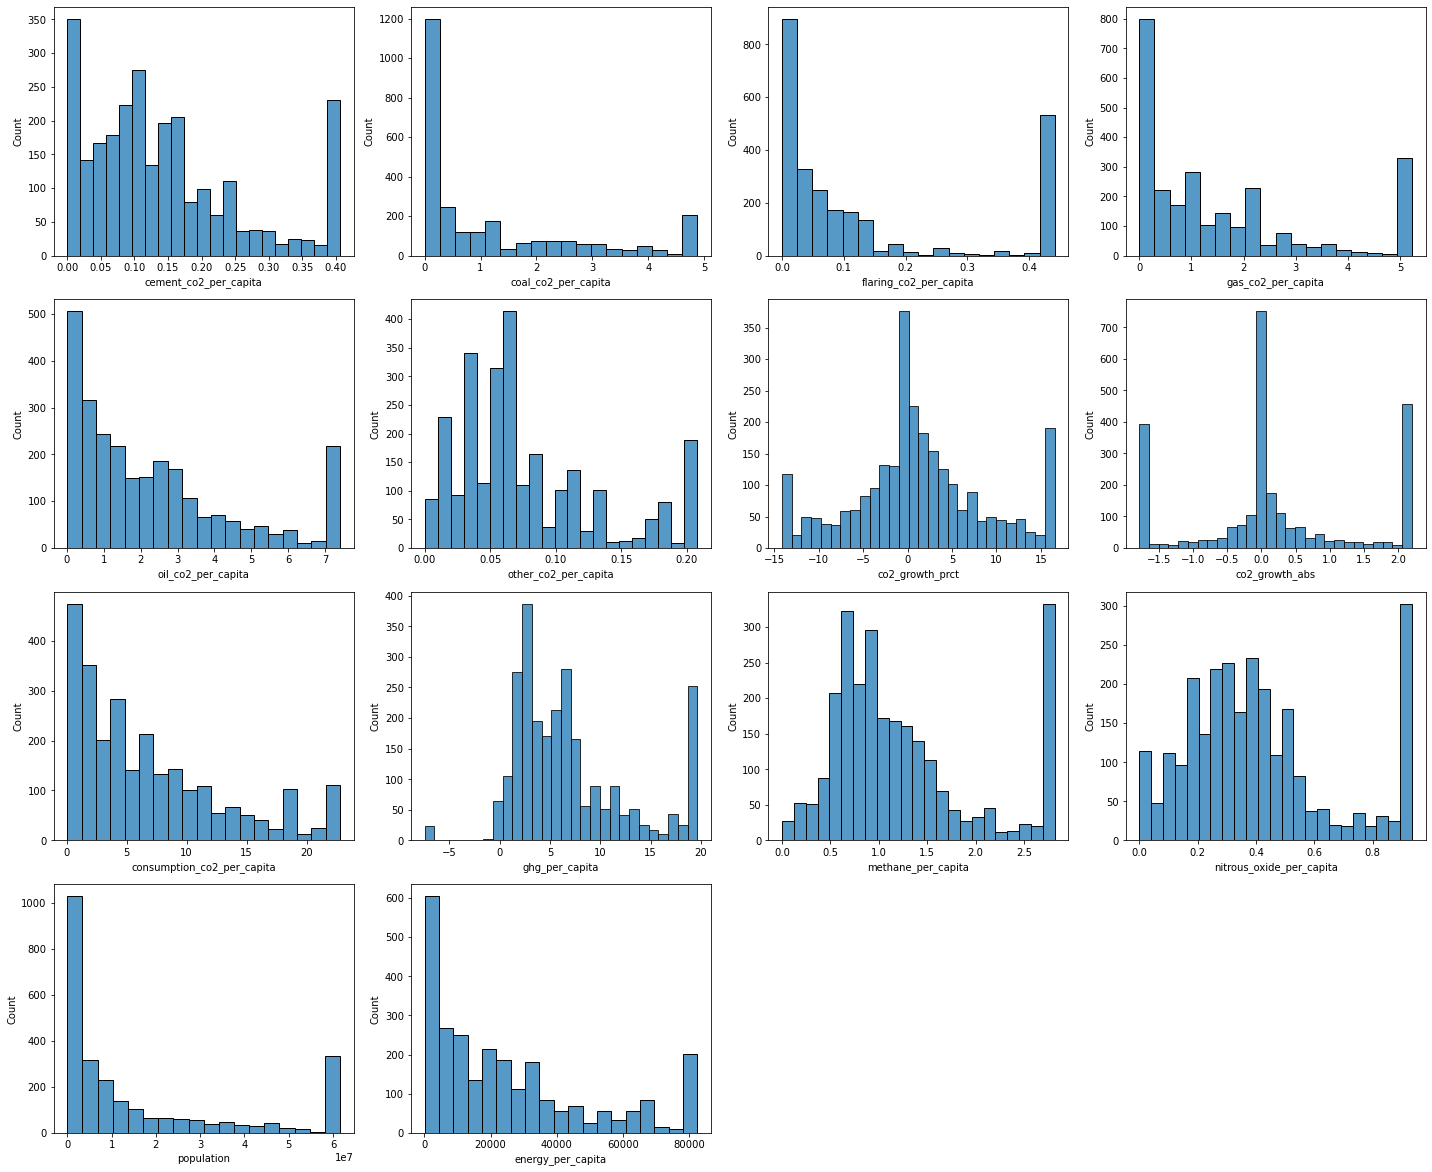

In [ ]:
plt.figure(figsize=(20,20))
column_list=list(carborn.columns)[3:]
plt_num=1

for i in column_list:
  if plt_num<=18:
    plt.subplot(5,4,plt_num)
    sns.histplot(carborn[i])
    plt_num=plt_num+1

  else:
    plt.subplot(5,4,plt_num)
    sns.histplot(carborn[i])
    plt_num=plt_num+1

plt.tight_layout()

## 3. Analysis

### a). Univariate Analysis

Univariate Analysis: Data consists of only one variable (only x value).
- Line Plots
- Histograms


**co2_per_capita**

<AxesSubplot:>

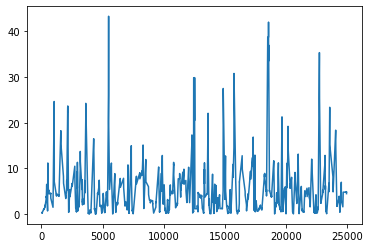

In [ ]:
#line graph to review co2_per_capita
carborn['co2_per_capita'].plot.line()

**cement_co2_per_capita**


<AxesSubplot:>

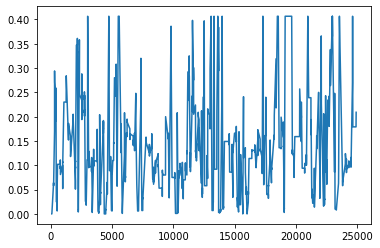

In [ ]:
carborn['cement_co2_per_capita'].plot.line()

**coal_co2_per_capita**

<AxesSubplot:>

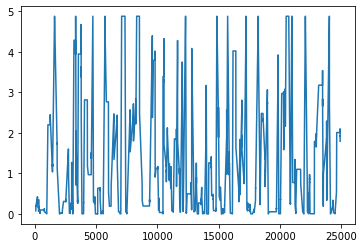

In [ ]:
#line graph to review coal_co2_per_capita
carborn['coal_co2_per_capita'].plot.line()

**flaring_co2_per_capita**

<AxesSubplot:>

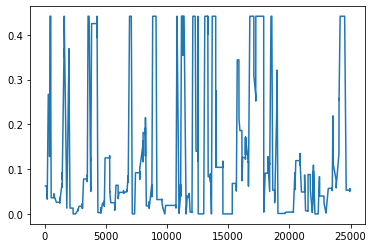

In [ ]:
#line graph to review flaring_co2_per_capita
carborn['flaring_co2_per_capita'].plot.line()

**gas_co2_per_capita**

<AxesSubplot:>

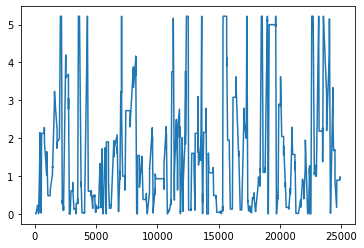

In [ ]:
#line graph to review gas_co2_per_capita
carborn['gas_co2_per_capita'].plot.line()

**oil_co2_per_capita**

<AxesSubplot:>

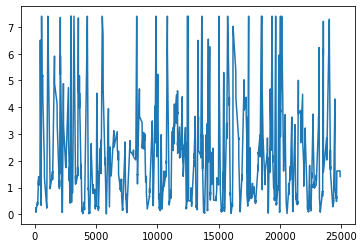

In [ ]:
#line graph to review oil_co2_per_capita
carborn['oil_co2_per_capita'].plot.line()

**other_co2_per_capita**

<AxesSubplot:>

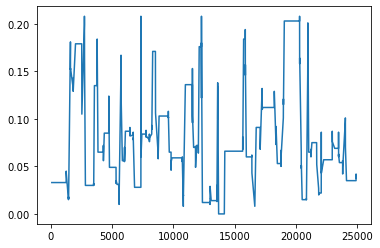

In [ ]:
#line graph to review other_co2_per_capita
carborn['other_co2_per_capita'].plot.line()

**co2_growth_prct**

<AxesSubplot:ylabel='Frequency'>

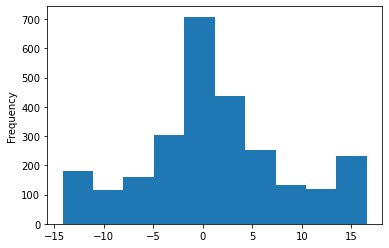

In [ ]:
#line graph to review co2_growth_prct
carborn['co2_growth_prct'].plot.hist()

**co2_growth_abs**

<AxesSubplot:ylabel='Frequency'>

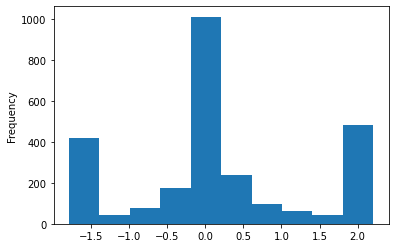

In [ ]:
#line graph to review co2_growth_abs
carborn['co2_growth_abs'].plot.hist()

**consumption_co2_per_capita**

<AxesSubplot:>

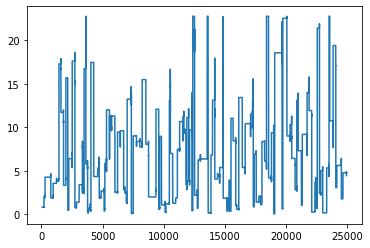

In [ ]:
#line graph to review consumption_co2_per_capita
carborn['consumption_co2_per_capita'].plot.line()

**ghg_per_capita**

<AxesSubplot:>

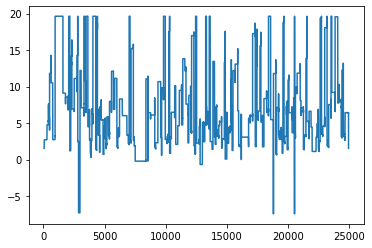

In [ ]:
#line graph to review ghg_per_capita
carborn['ghg_per_capita'].plot.line()

**methane_per_capita**

<AxesSubplot:>

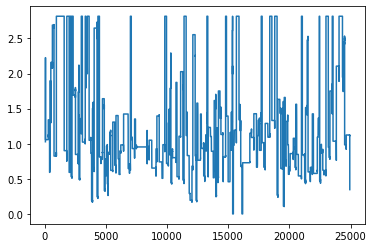

In [ ]:
#line graph to review methane_per_capita
carborn['methane_per_capita'].plot.line()

**nitrous_oxide_per_capita**

<AxesSubplot:>

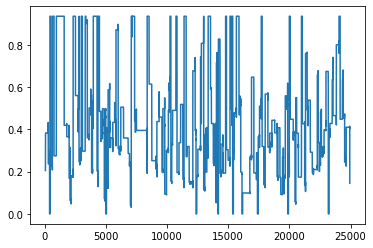

In [ ]:
#line graph to review nitrous_oxide_per_capita
carborn['nitrous_oxide_per_capita'].plot.line()

**population**

<AxesSubplot:>

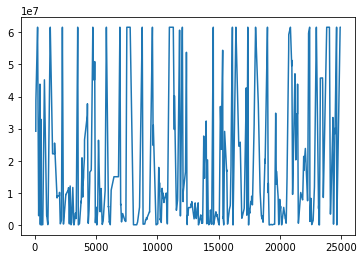

In [ ]:
#line graph to review population
carborn['population'].plot.line()

**energy_per_capita**

<AxesSubplot:>

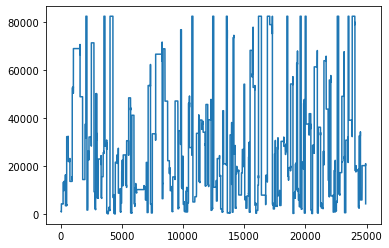

In [ ]:
#line graph to review energy_per_capita
carborn['energy_per_capita'].plot.line()

### b).Bivariate Analysis

Bivariate Analysis: Data involves two different variables.
- Pair plot
- Scatter Plots

There are three types of bivariate analysis
- Numerical & Numerical
- Categorical & Categorical
- Numerical & Categorical

In [ ]:
carborn.columns


Index(['country', 'year', 'co2_per_capita', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'co2_growth_prct',
       'co2_growth_abs', 'consumption_co2_per_capita', 'ghg_per_capita',
       'methane_per_capita', 'nitrous_oxide_per_capita', 'population',
       'energy_per_capita'],
      dtype='object')

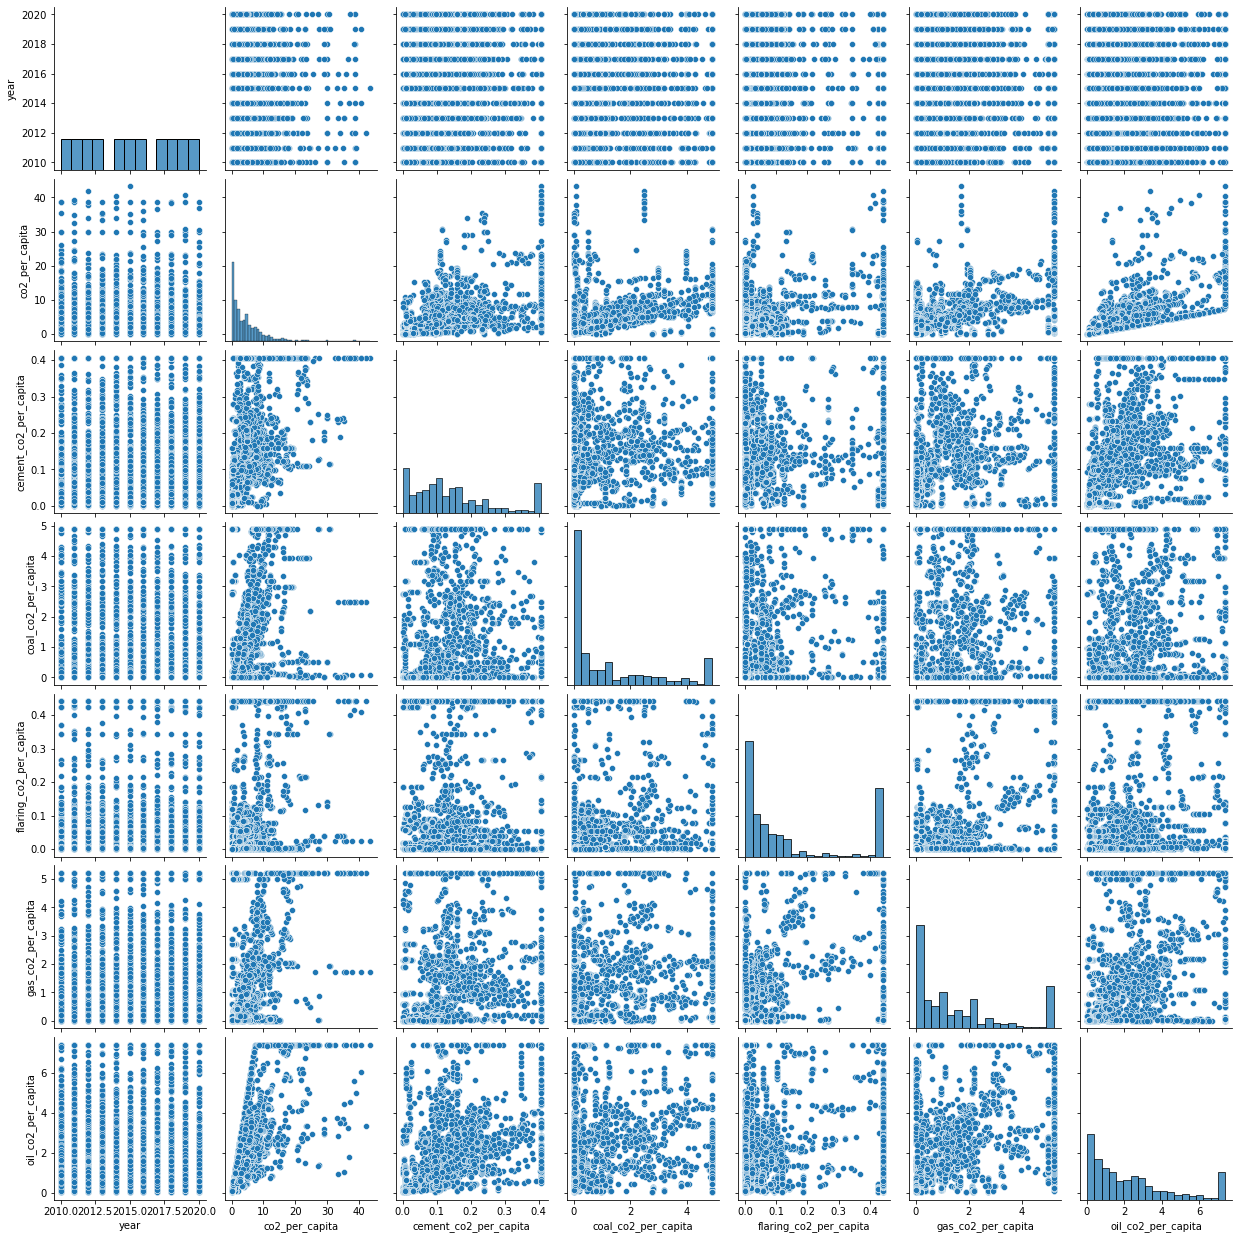

In [ ]:
# Pair plot
columns = carborn[['country', 'year', 'co2_per_capita', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita']]
sns.pairplot(columns)
plt.show()

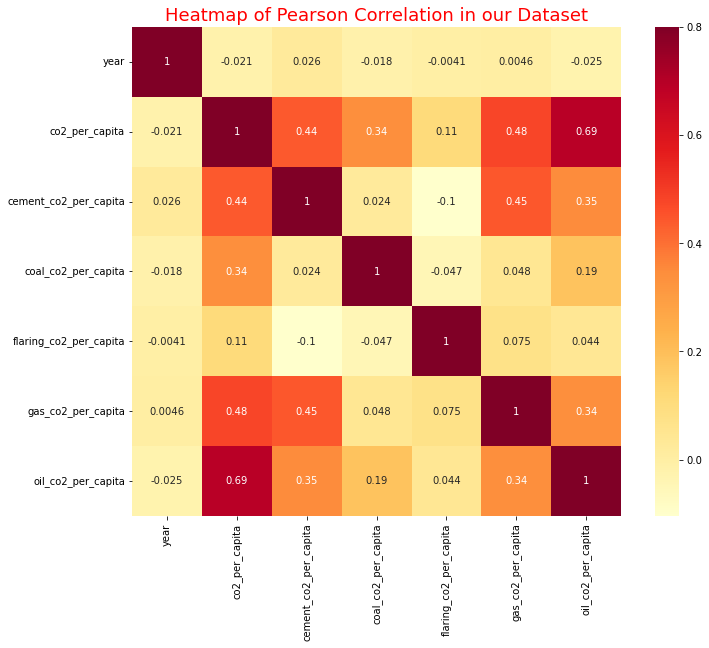

In [ ]:
#correlation matrix
corrmat = columns.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square=True, annot=True, cmap='YlOrRd')
plt.title('Heatmap of Pearson Correlation in our Dataset', color='red', fontsize= 18);

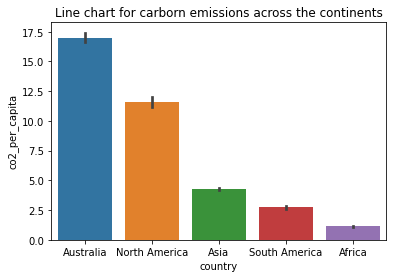

In [ ]:
# Getting the continent with the highest CO2 emissions
carborn_world = carborn[(carborn['country']== 'Africa') | (carborn['country']== 'Asia') |
                  (carborn['country']== 'North America') | (carborn['country']== 'South America')
                  | (carborn['country']== 'Australia')]
carborn_world.head()
carborn_world_sorted = carborn_world.sort_values(by='co2_per_capita', ascending =False)

sns.barplot(y='co2_per_capita', x='country', data=carborn_world_sorted).set(title ='Line chart for carborn emissions across the continents');

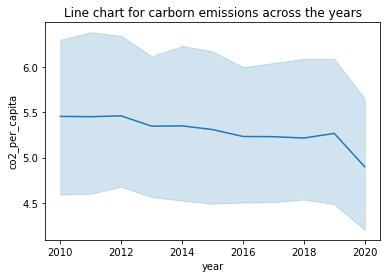

In [ ]:
# Getting the Year with the highest CO2 emissions
carborn_year = carborn[(carborn['year']== 2010) | (carborn['year']== 2011) |
                  (carborn['year']== 2012) | (carborn['year']== 2013)
                  | (carborn['year']== 2014) | (carborn['year']== 2015) | (carborn['year']== 2016)
                  | (carborn['year']== 2017) | (carborn['year']== 2018) 
                  | (carborn['year']== 2019) | (carborn['year']== 2020)]
carborn_year.head()
carborn_world_sorted = carborn_year.sort_values(by='co2_per_capita', ascending =False)

sns.lineplot(y='co2_per_capita', x='year', data=carborn_world_sorted).set(title ='Line chart for carborn emissions across the years');

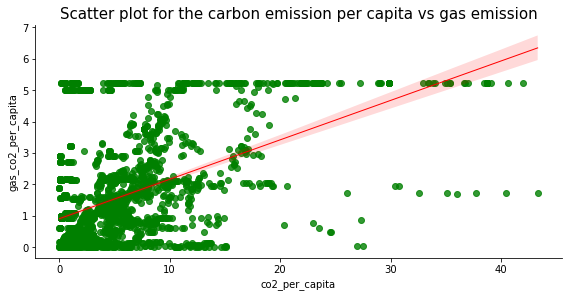

In [ ]:
sns.lmplot('co2_per_capita', 'gas_co2_per_capita', carborn, scatter_kws= {'marker': '0', 'color': 'green'}, line_kws= {'linewidth': 1, 'color': 'red'}, height=4, aspect=2)
plt.title("Scatter plot for the carbon emission per capita vs gas emission", fontsize= 15);

In [ ]:
carborn.head()

,country,year,co2_per_capita,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,co2_growth_prct,co2_growth_abs,consumption_co2_per_capita,ghg_per_capita,methane_per_capita,nitrous_oxide_per_capita,population,energy_per_capita
61,Afghanistan,2010,0.288,0.000,0.077,0.062,0.009,0.201,0.033,16.565,1.658000,0.829,1.543,1.028,0.205,29185511.0,1137.331
62,Afghanistan,2011,0.402,0.000,0.139,0.062,0.010,0.252,0.033,16.565,2.204125,0.829,1.939,1.311,0.219,30117411.0,1494.088
63,Afghanistan,2012,0.328,0.001,0.100,0.062,0.010,0.217,0.033,-14.135,-1.788875,0.829,2.134,1.565,0.230,31161378.0,1292.410
64,Afghanistan,2013,0.262,0.001,0.103,0.062,0.009,0.148,0.033,-14.135,-1.778000,0.829,2.310,1.801,0.239,32269592.0,1016.698
65,Afghanistan,2014,0.233,0.001,0.111,0.062,0.008,0.113,0.033,-7.900,-0.666000,0.829,2.528,2.031,0.256,33370803.0,889.321


## 4. Sampling

In this study we shall use cluster sampling. This is because our dataset is homogeneous in nature. We shall be using the KMeans method to do this.

In [ ]:
# Selecting the features of interest

X = carborn_world.iloc[:,1:3]

In [ ]:
# Creating the Clusters

kmeans = KMeans(5)

kmeans.fit(X)

KMeans(n_clusters=5)

In [ ]:
# Obtaining the Predicted Clusters

# Create a variable which will contain the predicted clusters for each observation
predicted_clusters = kmeans.fit_predict(X)
# Check the result
predicted_clusters

array([1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3])

In [ ]:
# Creating a copy of the data
data_with_clusters = carborn_world.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = predicted_clusters
# Check the result
data_with_clusters

,country,year,co2_per_capita,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,other_co2_per_capita,co2_growth_prct,co2_growth_abs,consumption_co2_per_capita,ghg_per_capita,methane_per_capita,nitrous_oxide_per_capita,population,energy_per_capita,Cluster
198,Africa,2010,1.172,0.057,0.42500,0.062000,0.194,0.434,0.033,2.27,2.204125,0.829,2.717,1.058000,0.383000,6.158043e+07,4296.284000,1
199,Africa,2011,1.181,0.055,0.40600,0.054000,0.208,0.457,0.033,3.34,2.204125,0.839,2.717,1.058000,0.383000,6.158043e+07,4201.565000,1
200,Africa,2012,1.146,0.058,0.39300,0.054000,0.214,0.427,0.033,-0.44,-1.788875,0.829,2.717,1.058000,0.383000,6.158043e+07,4237.315000,1
201,Africa,2013,1.123,0.059,0.38100,0.051000,0.211,0.422,0.033,0.57,2.204125,0.858,2.717,1.058000,0.383000,6.158043e+07,4239.018000,1
202,Africa,2014,1.184,0.061,0.39500,0.050000,0.214,0.464,0.033,8.19,2.204125,0.873,2.717,1.058000,0.383000,6.158043e+07,4255.662000,1
203,Africa,2015,1.119,0.062,0.36300,0.046000,0.215,0.434,0.033,-2.99,-1.788875,0.837,2.717,1.058000,0.383000,6.158043e+07,4207.085000,1
204,Africa,2016,1.119,0.064,0.35800,0.039000,0.220,0.438,0.033,2.57,2.204125,0.840,2.717,1.058000,0.383000,6.158043e+07,4208.474000,3
205,Africa,2017,1.113,0.062,0.35400,0.040000,0.228,0.430,0.033,2.04,2.204125,0.825,2.717,1.058000,0.383000,6.158043e+07,4195.585000,3
206,Africa,2018,1.086,0.063,0.35300,0.035000,0.226,0.409,0.033,0.09,1.273000,0.802,2.717,1.058000,0.383000,6.158043e+07,4222.128000,3
207,Africa,2019,1.077,0.060,0.35500,0.034000,0.223,0.405,0.033,1.65,2.204125,0.791,2.717,1.058000,0.383000,6.158043e+07,4219.738000,3


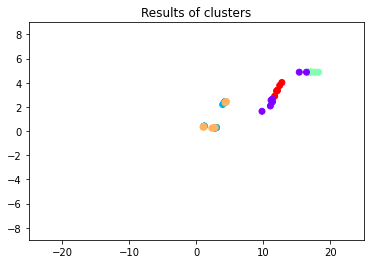

In [ ]:
# Plotting the Clustering Results

plt.scatter(data_with_clusters['co2_per_capita'],data_with_clusters['coal_co2_per_capita'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-25,25)
plt.ylim(-9,9)
plt.title('Results of clusters')
plt.show()

## 5. Hypothesis Testing

Null Hypothesis (μ1=μ2): 

Areas with the highest measurements per capita are responsible for the highest rates of carbon dioxide emissions.


Alternative Hypothesis (μ1≠μ2): 

Areas with the highest measurements per capita are  not responsible for the highest rates of carbon dioxide emissions.

Statistical test: sample z-test

Signifance level, alpha = 0.05

In [ ]:
#The Z-test of the Carbon dioxide per Capita that are taken.
ztest ,pval = weightstats.ztest(data_with_clusters.co2_per_capita, x2=None, value=55)
print('Ztest: ',ztest)
print('P Value: ',float(pval))
if pval<0.05:
    print("We Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Ztest:  -58.0484163039776
P Value:  0.0
We Reject the null hypothesis


## 6. Checking for normality

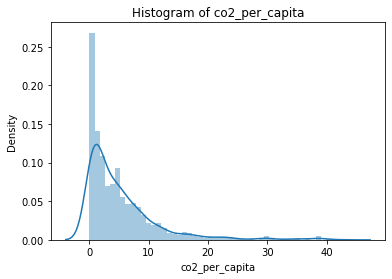

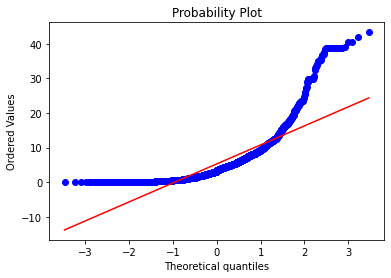

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['co2_per_capita' ]);
plt.title('Histogram of co2_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['co2_per_capita'],plot=plt)

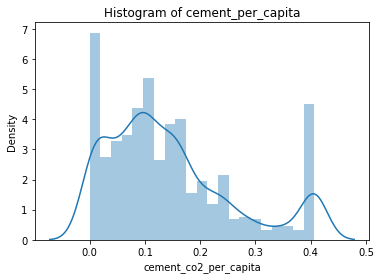

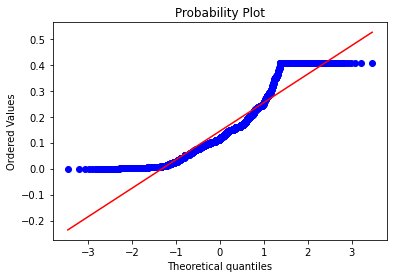

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['cement_co2_per_capita']);
plt.title('Histogram of cement_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['cement_co2_per_capita'],plot=plt)

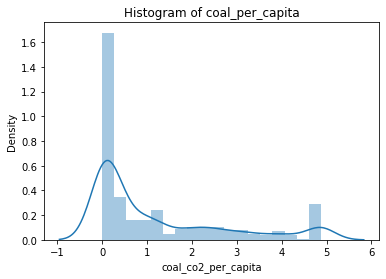

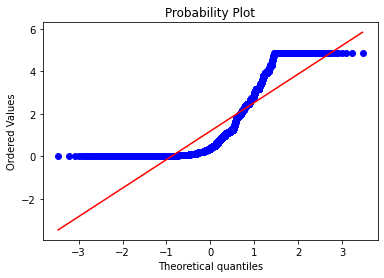

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['coal_co2_per_capita' ]);
plt.title('Histogram of coal_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['coal_co2_per_capita'],plot=plt)

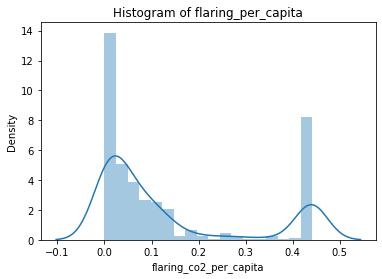

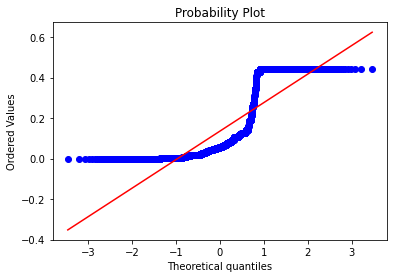

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['flaring_co2_per_capita' ]);
plt.title('Histogram of flaring_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['flaring_co2_per_capita'],plot=plt)

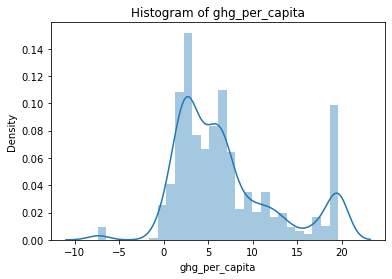

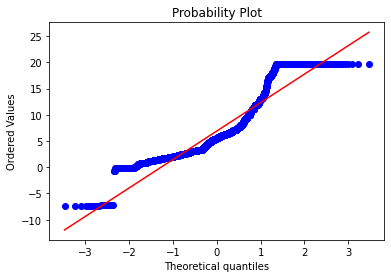

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['ghg_per_capita']);
plt.title('Histogram of ghg_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['ghg_per_capita'],plot=plt)

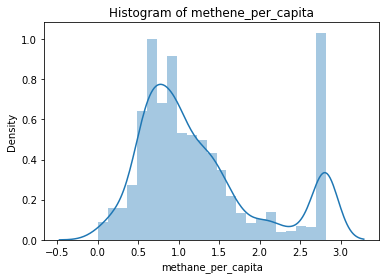

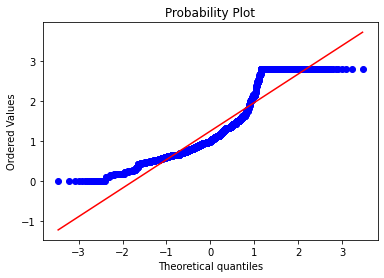

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['methane_per_capita' ]);
plt.title('Histogram of methene_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['methane_per_capita'],plot=plt)

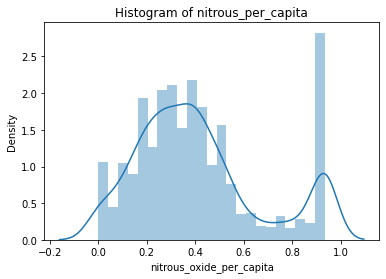

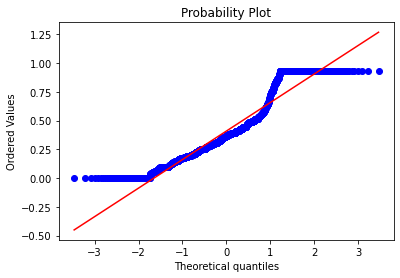

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['nitrous_oxide_per_capita' ]);
plt.title('Histogram of nitrous_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['nitrous_oxide_per_capita'],plot=plt)

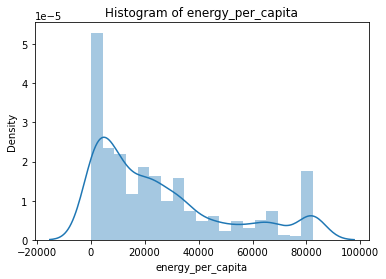

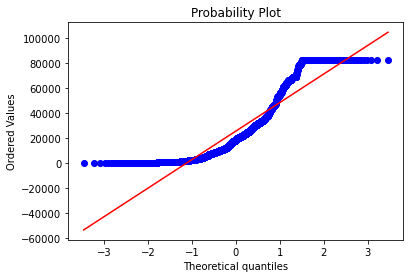

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['energy_per_capita' ]);
plt.title('Histogram of energy_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['energy_per_capita'],plot=plt)

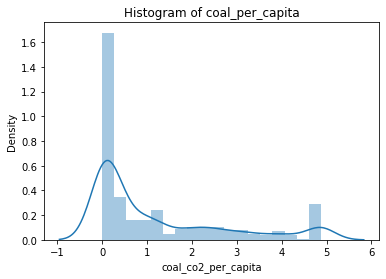

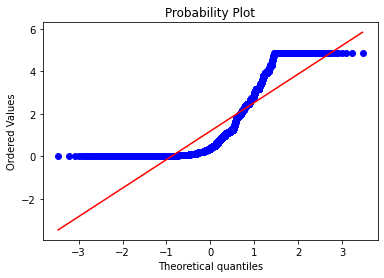

In [ ]:
#histogram and normal probability plot
sns.distplot(carborn['coal_co2_per_capita' ]);
plt.title('Histogram of coal_per_capita')
fig = plt.figure();
res = stats.probplot(carborn['coal_co2_per_capita'],plot=plt)

### 7. Time Series Analysis

In [ ]:
# Converting the year to datetime format

data_with_clusters['year'] = pd.to_datetime(data_with_clusters.iloc[:, 1])

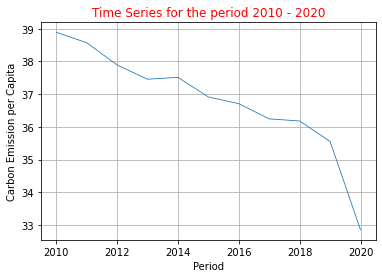

In [ ]:
# Plotting the Time Series of the Carbon Emission per Capita

data_with_clusters["co2_per_capita"].plot(linewidth=0.8,grid=True)
plt.xlabel('Period')
plt.ylabel('Carbon Emission per Capita')
plt.title('Time Series for the period 2010 - 2020',color='red')
plt.show()

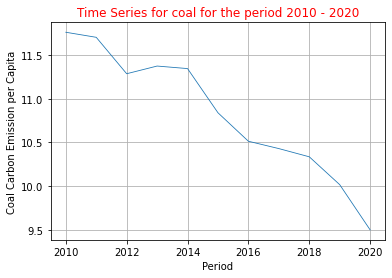

In [ ]:
# Plotting the Time Series of the coal

data_with_clusters["coal_co2_per_capita"].plot(linewidth=0.8,grid=True)
plt.xlabel('Period')
plt.ylabel('Coal Carbon Emission per Capita')
plt.title('Time Series for coal for the period 2010 - 2020',color='red')
plt.show()

### 8. Conclusion

From the time series model we can conclude that the global emmision has been reducing over the years. Our hypothesis test
clearly showed evidence to support our alternative hypothesis that areas with the highest measurements per capita are  not responsible for the highest rates of carbon dioxide emissions.


### 9. Recommendation

In as much as the Carbon dioxide emission units are reducing in the last decade, we have only managed to reduce it by 6 million units. This is an improvement but still, we are at 33 million units. This is quite high and hence we recommend more countries embrace carbon reduction methods. With new technology, we encourage more adoption the electric cars, planting more trees, and avoiding the use of carbon fuels like oil, coal, and gas among others.